<a href="https://colab.research.google.com/github/helakhaddar/Graduation_project/blob/main/Data_Preparation_and_analysis_of_the_final_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and analysis of the final dataset
1 - Merged the twitter and kaggle dataset (already merged and saved in another notebook) with another cyberbullying tweets dataset so we can do some balance of the cyberbullying and bullying class

2 - Analyze this dataset after removing the duplicated and the null values:
*   plotting the distribution of the classes
*   see the relation between the sentiment and the cyberbullying:
There is some texts that have negative sentiment that are not cyberbullying and for the positive sentimpent it was 50% cyberbullying and 50% non cyberbullying



## importing the librairies

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import os
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

## Useful function

In [ ]:
def plot_label_distribution(df, label_column='Label'):
    # Map the label column
    df['label'] = df[label_column].map({0: 'Non-cyberbullying', 1: 'Bullying'})

    # Plotting the distribution
    plt.figure(figsize=(6, 4))
    df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
    plt.title('Distribution of Cyberbullying Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

def plot_distribution_sentimentlabel(df):

  plt.figure(figsize=(3, 3))
  df['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'red'])
  plt.title('Distribution of sentiment Labels ')
  plt.xlabel('sentiment')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

def plot_relation_sent_label(df):
  sent_label_cross = pd.crosstab(df['Sentiment'], df['Label'])
  sent_label_cross['sum'] = sent_label_cross[0.0] + sent_label_cross[1.0]
  sent_label_cross['non bullying tweet %'] = sent_label_cross[0.0]/sent_label_cross['sum']*100
  sent_label_cross['bullying tweet %'] = sent_label_cross[1.0]/sent_label_cross['sum']*100
  sent_label_cross = sent_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

  ax = sent_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
  plt.xlabel('Sentiment')
  plt.ylabel('percentage %')
  plt.title('Relation between sentiment and bullying')
  ax.legend(loc='lower right')
  plt.show()

## Cleaning the cyberbullying tweets dataset:


*   combine the cyberbullying classes in one class
*   Dropping the other columns
*   Removing the duplicated



In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/PFE/Data/cyberbullying_tweets.csv")

In [ ]:
tweets['Label'] = tweets['cyberbullying_type'].replace({'not_cyberbullying':0,'age':1,'ethnicity':1,'gender':1,'religion':1, 'other_cyberbullying':1})
tweets.drop(['cyberbullying_type'], axis=1, inplace=True)
tweets.rename(columns={'tweet_text': 'Text'}, inplace=True)

In [ ]:
tweets.head()

,Text,Label
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


In [ ]:
print("the dataset shape is", tweets.shape)

the dataset shape is (47692, 2)


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    47692 non-null  object
 1   Label   47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


In [ ]:
tweets.duplicated().sum()

166

In [ ]:
tweets = tweets[~tweets.duplicated()]

In [ ]:
tweets.isnull().sum()

Text     0
Label    0
dtype: int64

In [ ]:
tweets['Label'].value_counts()

Label
1    39589
0     7937
Name: count, dtype: int64

## Merging the tweets dataset with the cyberbylling dataset (twiiter and kaggle):

*   Removing the duplicates
*   see if there is some null values and remove them
*   Doing some analyzes like seeing the distribution of the classes , see the realtion btw the sentiment and the cyberbullying





In [ ]:
Twitter_kaggle = pd.read_csv("/content/drive/MyDrive/PFE/Data/merged_dataset2.csv")

In [ ]:
Final = pd.concat([Twitter_kaggle[['Text', 'Label']], tweets[['Text', 'Label']]], axis=0, ignore_index=True)

In [ ]:
Final.duplicated().sum()

8534

In [ ]:
Final = Final[~Final.duplicated()]

In [ ]:
Final['Label'].value_counts()

Label
1.0    43611
0.0    21028
Name: count, dtype: int64

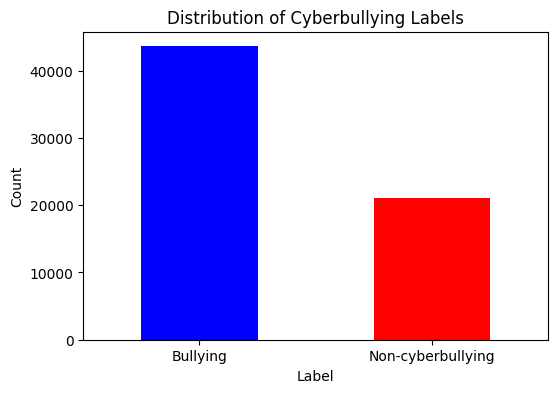

In [ ]:
plot_label_distribution(Final)

In [ ]:
Final.drop(['Label', 'Sentiment_Label'], axis=1, inplace=True)
Final.head()

,Text,label
0,@halalflaws @biebervalue @greenlinerzjm I read...,Non-cyberbullying
1,@ShreyaBafna3 Now you idiots claim that people...,Non-cyberbullying
2,"RT @Mooseoftorment Call me sexist, but when I ...",Bullying
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",Bullying
4,#mkr No No No No No No,Non-cyberbullying


In [ ]:
Final.to_csv(os.path.join('/content/drive/MyDrive/PFE/Data', 'final.csv'), index=False)

We saved this dataset in order to extract the sentiment features

## Data analysis
After extracting the sentiment features, we did some analysis

In [ ]:
data_sentiment = pd.read_csv("/content/drive/MyDrive/PFE/Data/Data_with_Sentiment.csv")

In [ ]:
data_sentiment.head()

,Text,label,Sentiment
0,@halalflaws @biebervalue @greenlinerzjm I read...,Non-cyberbullying,neutral
1,@ShreyaBafna3 Now you idiots claim that people...,Non-cyberbullying,negative
2,"RT @Mooseoftorment Call me sexist, but when I ...",Bullying,neutral
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",Bullying,negative
4,#mkr No No No No No No,Non-cyberbullying,neutral


In [ ]:
data_sentiment.Sentiment.value_counts()

Sentiment
positive    24519
negative    24347
neutral     15773
Name: count, dtype: int64

In [ ]:
data_sentiment['Label'] = data_sentiment['label'].replace({'Non-cyberbullying':0,'Bullying':1})
data_sentiment.drop(['label'], axis=1, inplace=True)
data_sentiment.head()

,Text,Sentiment,Label
0,@halalflaws @biebervalue @greenlinerzjm I read...,neutral,0
1,@ShreyaBafna3 Now you idiots claim that people...,negative,0
2,"RT @Mooseoftorment Call me sexist, but when I ...",neutral,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",negative,1
4,#mkr No No No No No No,neutral,0


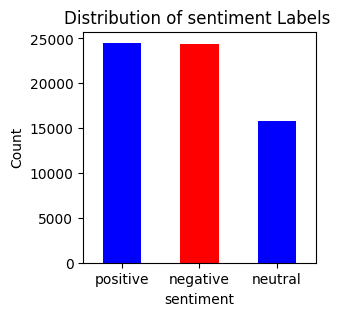

In [ ]:
plot_distribution_sentimentlabel(data_sentiment)

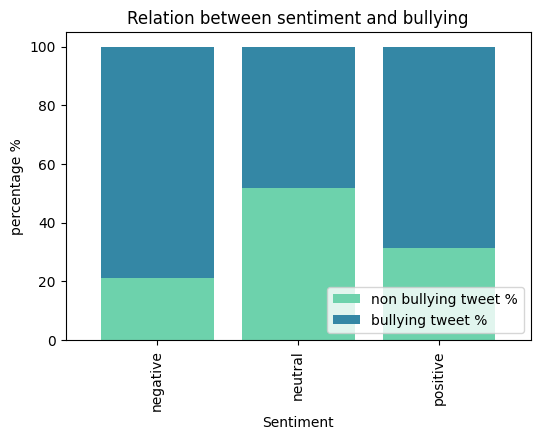

In [ ]:
plot_relation_sent_label(data_sentiment)